# EE4309 Object Detectation Project - Google Colab Version

This notebook maintains the same experience as the local Makefile commands, allowing you to easily run the project on Colab.

## 📝 Important Notes
1. **Enable GPU**: Click `Runtime` → `Change runtime type` → Select `T4 GPU`
2. **Run Order**: Please run cells in sequence
3. **Command Mapping**: Each cell corresponds to a make command

## 🔧 Step 0: Clone Project and Enter Directory

In [ ]:
# !git clone https://github.com/Enderfga/EE4309_proj.git
%cd EE4309_proj

c:\Users\Admin\Desktop\NUS\Y4S1\EE4309\Labs\EE4309_proj
c:\Users\Admin\Desktop\NUS\Y4S1\EE4309\Labs\EE4309_proj


In [1]:
%matplotlib inline

## 📦 Step 1: Setup (equivalent to `make setup`)

In [2]:
# Install project dependencies (equivalent to make setup)
!pip install -q -r requirements.txt -e .

In [2]:
# Verify environment
import torch
print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

✅ PyTorch version: 2.9.0+cu128
✅ CUDA available: True
✅ GPU: NVIDIA GeForce RTX 3080
✅ GPU Memory: 9.6 GB


## 📋 Help (equivalent to `make help`)

In [3]:
# Show all available commands (equivalent to make help)
!make help

EE4309 ObjDet Project
Usage: make <target>

check                Run all checks
clean                Clean up runs directory
eval                 Evaluate the model (override WEIGHTS=... MODEL=...)
format               Format code
help                 Show this help message
infer                Run inference (override INPUT=... MODEL=...; run 'make samples' first)
lint                 Run code linting
samples              Download sample images for inference testing
setup                Install dependencies and setup the project in editable mode
submit               Create a submission
test                 Run tests
train                Train the model (override MODEL=resnet50 etc.)


## 🖼️ Step 2: Download Samples (equivalent to `make samples`)

In [4]:
# Download sample images (equivalent to make samples)
!make samples

bash scripts/download.sh
📥 Downloading sample images to data/sample_images
1. Downloading image with person...
2. Downloading image with dog...
3. Downloading image with horses...
4. Downloading image with eagle...

📊 Download results:
✅ Successfully downloaded 4 sample images
📁 Image list:
-rw-rw-r-- 1 saber saber 160K Oct 22 23:32  data/sample_images/dog.jpg
-rw-rw-r-- 1 saber saber 139K Oct 22 23:32  data/sample_images/eagle.jpg
-rw-rw-r-- 1 saber saber 131K Oct 22 23:32  data/sample_images/horses.jpg
-rw-rw-r-- 1 saber saber 112K Oct 22 23:32  data/sample_images/person.jpg

🚀 Now you can run inference test:
   bash scripts/infer.sh runs/frcnn_r50fpn_voc07/best.pt data/sample_images/

💡 Tips:
1. You can also copy your own images to data/sample_images directory
2. Supported formats: jpg, jpeg, png
3. Images should preferably contain objects from VOC dataset's 20 classes


## 🚀 Step 3: Train Model (equivalent to `make train`)

**Note**: On Colab, consider using fewer epochs to save time

## Modifications made to training

1. Add ColourJitter to training transforms
2. Change optimiser to AdamW and scheduler to CosineAnnealingLR
3. Add gradient clipping
4. Implement gradient accumulation
5. Modify learning rate
6. Plot training and validation losses across epochs
7. (Attempted) t-SNE dimensionality reduction visualisation

I also tried to increase the batch size but ran into issues with CUDA memory limits especially since I am performing the training locally.

In [27]:
# Standard training (equivalent to make train)
# model choices: "reset50", "vit"
!make train BATCH_SIZE=1 EPOCHS=20 MODEL="vit" LR=5e-4

bash scripts/train.sh "runs/vit_voc07" "20" "1" "vit"
🚀 Starting training...
Model: vit
Output directory: runs/vit_voc07
Epochs: 20
Batch size: 1

📊 Dataset configuration:
- Dataset: trainval (PASCAL VOC 2007)
- Train samples: 2000 (from index 0-1999)
- Val samples: 500 (from index 2000-2499)
- Test set: reserved for final evaluation

/home/saber/workspaces/auv4_cv/j3_env/lib/python3.10/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
/home/saber/workspaces/auv4_cv/j3_env/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
Opening dataset in read-only m

Display loss and mAP after training

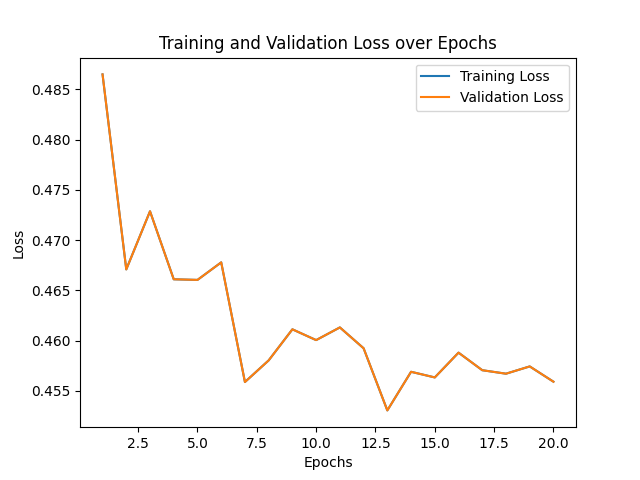

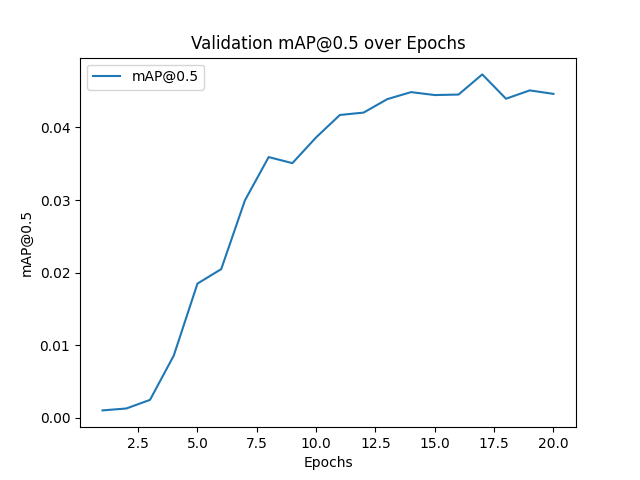

In [41]:
from IPython.display import Image, display
import os

# Display loss and mAP after training
if os.path.exists("loss_progress.png"):
    display(Image("loss_progress.png"))
else:
    print("Loss progress image not found.")
if os.path.exists("map_progress.png"):
    display(Image("map_progress.png"))
else:
    print("mAP progress image not found.")

Display t-SNE visualisation after training

In [42]:
if os.path.exists("tsne_voc_features.png"):
    display(Image("tsne_voc_features.png"))
else:
    print("t-SNE visualisation not found.")

t-SNE visualisation not found.


## 📊 Step 4: Evaluate Model (equivalent to `make eval`)

In [30]:
# Evaluate the model (equivalent to make eval)
!make eval

bash scripts/evaluate.sh "runs/vit_voc07/best.pt" "test" "500" "vit"
🚀 Starting evaluation...
Weights: runs/vit_voc07/best.pt
Image set: test
Subset size: 500
Model (requested/default): vit

/home/saber/workspaces/auv4_cv/j3_env/lib/python3.10/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
Opening dataset in read-only mode as you don't have write permissions.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/pascal-voc-2007-test

hub://activeloop/pascal-voc-2007-test loaded successfully.

eval:  12%|██████▉                                                 | 62/500 [00:04<00:19, 21.91it/s]/home/saber/workspaces/auv4_cv/j3_env/lib/python3.10/site-packages/deeplake/core/dataset/dataset.py:642: UserWarning: Indexing by integer in a for loop, like `for i in

## 🔍 Step 5: Run Inference (equivalent to `make infer`)

In [31]:
# Run inference (equivalent to make infer)
!make infer

bash scripts/infer.sh "runs/vit_voc07/best.pt" "data/sample_images" "vit"
🚀 Running inference...
Weights: runs/vit_voc07/best.pt
Input: data/sample_images
Model (requested/default): vit
/home/saber/workspaces/auv4_cv/j3_env/lib/python3.10/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
saved: runs/infer_vis/dog_det.jpg
saved: runs/infer_vis/eagle_det.jpg
saved: runs/infer_vis/horses_det.jpg
saved: runs/infer_vis/person_det.jpg
✅ Inference completed! Check results in runs/infer_vis/


## 📝 Submit Your Work (equivalent to `make submit`)

**Important**: This will create a git commit with your student information

In [ ]:
# Submit your work with student information (equivalent to make submit)
# You will be prompted to enter:
# - Your full name
# - Your student ID (format: A0123456X)
# - Optional additional message
# Please run this command before compressing and submitting your project.
!make submit

---

## 💾 Extra: Save to Google Drive

In [ ]:
# Mount Google Drive to save training results
from google.colab import drive
drive.mount('/content/drive')

# Create save directory
!mkdir -p /content/drive/MyDrive/EE4309_results

# Copy training results
!cp -r runs/* /content/drive/MyDrive/EE4309_results/
print("✅ Results saved to Google Drive!")

## 📈 Visualize Inference Results

Displaying inference detection results:


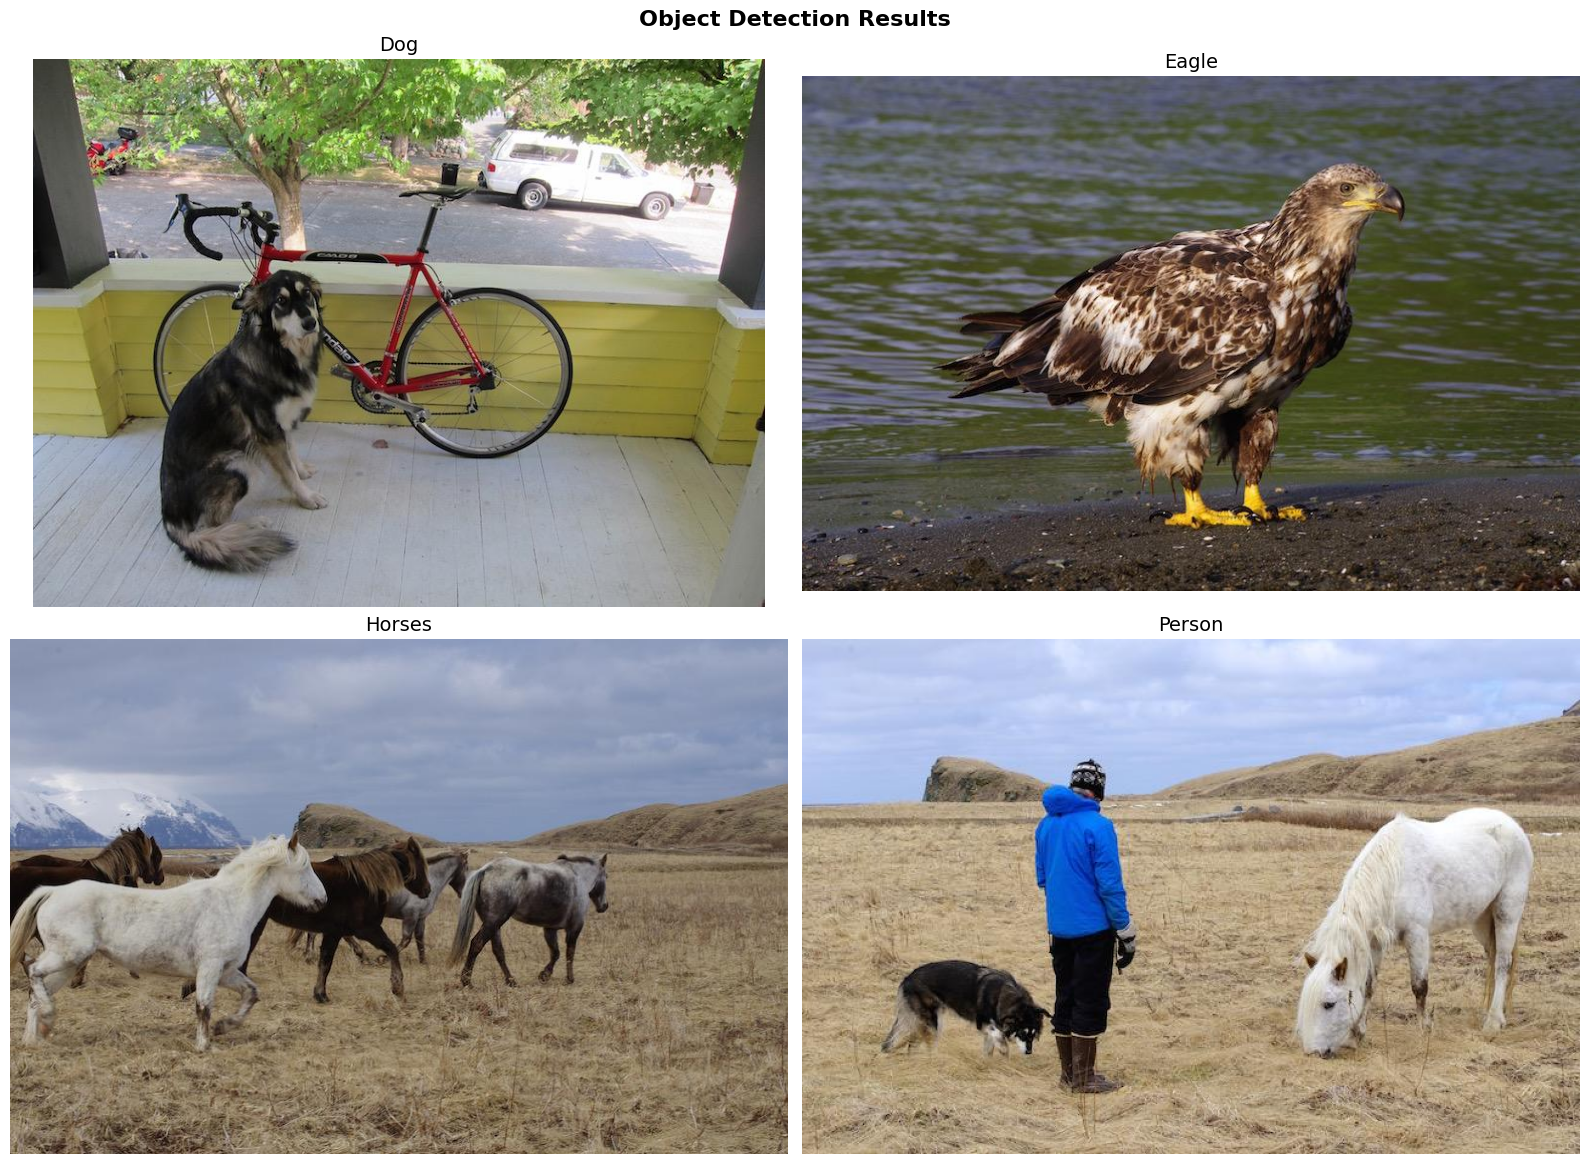

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Detection result images to display
detection_images = [
    'runs/infer_vis/dog_det.jpg',
    'runs/infer_vis/eagle_det.jpg', 
    'runs/infer_vis/horses_det.jpg',
    'runs/infer_vis/person_det.jpg'
]

# Check which images exist
existing_images = [img for img in detection_images if os.path.exists(img)]

if len(existing_images) >= 4:
    print("Displaying inference detection results:")
    
    # Create 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Object Detection Results', fontsize=16, fontweight='bold')
    
    # Flatten axes for easy iteration
    axes_flat = axes.flatten()
    
    for i, img_path in enumerate(existing_images[:4]):
        try:
            img = mpimg.imread(img_path)
            axes_flat[i].imshow(img)
            # Extract image name without extension for title
            img_name = os.path.basename(img_path).replace('_det.jpg', '')
            axes_flat[i].set_title(img_name.title(), fontsize=14)
            axes_flat[i].axis('off')
        except Exception as e:
            axes_flat[i].text(0.5, 0.5, f'Error loading\n{os.path.basename(img_path)}', 
                            ha='center', va='center', transform=axes_flat[i].transAxes)
            axes_flat[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
elif len(existing_images) > 0:
    print(f"Found {len(existing_images)} detection results:")
    
    # Calculate grid size for available images
    n_images = len(existing_images)
    n_cols = min(2, n_images)
    n_rows = (n_images + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    fig.suptitle('Available Detection Results', fontsize=16, fontweight='bold')
    
    # Handle single image case
    if n_images == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if hasattr(axes, '__iter__') else [axes]
    else:
        axes = axes.flatten()
    
    for i, img_path in enumerate(existing_images):
        try:
            img = mpimg.imread(img_path)
            axes[i].imshow(img)
            img_name = os.path.basename(img_path).replace('_det.jpg', '')
            axes[i].set_title(img_name.title(), fontsize=14)
            axes[i].axis('off')
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error loading\n{os.path.basename(img_path)}', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(n_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No detection result images found.")
    print("Please run inference first:")
    print("!make infer")

## 📊 Check Git History (View Submission Records)

In [ ]:
# View git commit history to check submissions
!git log --oneline -n 5

In [ ]:
# View detailed changes in the last commit
!git diff HEAD~1 --stat

## ⚠️ Troubleshooting

### 1. GPU Out of Memory
```bash
# Reduce batch size
!bash scripts/train.sh --batch-size 64 --epochs 20
```

### 2. Runtime Limits
- Colab free tier has ~12 hour limit
- Use checkpoint feature to train in segments
- Save to Google Drive regularly

### 3. Disconnection Issues
- Use resume training feature above to continue
- Consider Colab Pro for longer runtime

### 4. Submission Issues
- Make sure you run `make submit` before the deadline
- Use `git log` to verify your submission was recorded
- Your instructor can use `git diff` to review your changes